In [37]:
import numpy as np

from sympy import *
from sympy.plotting.plot import plot3d_parametric_line, plot3d_parametric_surface
init_printing()

import matplotlib.pyplot as plt
%matplotlib inline


from mayavi import mlab
mlab.init_notebook()
mlab.clf()



Notebook initialized with ipy backend.


In [6]:
from sympy.vector import CoordSys3D 
C = CoordSys3D('C')

In [6]:
x,y,z,u,v, t = symbols('x y z u v t')

In [7]:
def Substitute(f,*args):
    '''
    the number of the variables of the vectorial function 'f' must be eqaul to the given parameters.
    Examples:
    1- Substitute((cos(t),sin(t),t),(t,pi))
    2- Substitute((v*cos(u),v*sin(u),u),(u,pi),(v,3))
    
    '''
    if not isinstance(f, tuple):
        for case in args:
            f = f.subs(*case)
        return f
    
    parameters = set()
    result=[]
    for component in f:
        # in the below the 'if statement' check if the component of curve is a sympy object. 
        if isinstance(component,tuple(core.all_classes)):
            parameters.update(component.free_symbols)
        
            
        
    assert len(args)==len(parameters), "Error: the number of given parameters isn't equal to the number of variables of the function"
    
    # Here we call the component of the curve one-by-one and substitute the free variables by given parameteres. 
    for component in f:
        if not isinstance(component,tuple(core.all_classes)):
            result.append(component)
            continue
        for variable in args:
            component = component.subs(variable[0],variable[1])
        result.append(component)
    return tuple(result) 

In [ ]:
def Plot_Position_Vector(curve, a, number=5):
    '''
    This function takes a 2D curve and draw some of its positional vectors.
    f: (Tuple) 2D parametric curve,
    a: (Tulpe with 3 elements)(parameter, start, stop)
    number: (integer) number of the position vectors in the above interval. 
    '''
    
    from sympy.plotting.plot import plot_parametric
    curve_components = tuple(curve.components.values())
    plot_curve = plot_parametric(*curve_components, a, show=False)
    
    fig, ax = plt.subplots(ncols=1)
    ax.set_aspect('equal')
    
    dx = [Substitute(f[0],(a[0],x)) for x in np.linspace(float(a[1]),float(a[2]),number)]
    dy = [Substitute(f[1],(a[0],y)) for y in np.linspace(float(a[1]),float(a[2]),number)]
    for i in range(len(dx)):
        ax.arrow(0,0,float(dx[i]),float(dy[i]),head_width = 0.05, head_length=0.05,length_includes_head=True)
        #ax.add_artist(a)
    
    
   
    
    move_sympyplot_to_axes(plot_curve, ax)
    
    
    plt.show()

In [ ]:
def Plot3d_Position_Vector(f, a, number=5):
    '''
    This function takes a 3D curve and draw some of its positional vectors.
    f: (Tuple) 3D parametric curve,
    a: (Tulpe with 3 elements)(parameter, start, stop)
    number: (integer) number of the position vectors in the above interval. 
    '''
    from sympy.plotting.plot import plot3d_parametric_line
    from mpl_toolkits.mplot3d import Axes3D
    curve = plot3d_parametric_line(*f, a, show = False)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    '''fig, ax = plt.subplots(ncols=1)
    ax.set_aspect('equal')
    ax.gca(projection='3d')'''
    
    dx = [Substitute(f[0],(a[0],x)) for x in np.linspace(float(a[1]),float(a[2]),number)]
    dy = [Substitute(f[1],(a[0],y)) for y in np.linspace(float(a[1]),float(a[2]),number)]
    dz = [Substitute(f[2],(a[0],z)) for z in np.linspace(float(a[1]),float(a[2]),number)]
    for i in range(len(dx)):
        a = Arrow3D([0,float(dx[i])],[0,float(dy[i])],[0,float(dz[i])], 
                    mutation_scale=20, lw=1, arrowstyle="-|>", color="r")
        ax.add_artist(a)
        
    move_sympyplot_to_axes(curve, ax)
    plt.draw()
    plt.show()

In [ ]:
def Dot(x,y):
    assert len(x)==len(y), "Two vectors must have the same dimension" 
    result = 0
    for i in range(len(x)):
        result += x[i]*y[i]
    return result

In [ ]:
def Cross(v ,u):
    '''
    Cross product of two vectors in the Cartesian Coordinate System
    '''
    assert len(v)==len(u)==3,'Error'
    return (v[1]*u[2] - v[2]*u[1], -(v[0]*u[2]-v[2]*u[0]), v[0]*u[1] - v[1]*u[0])

In [ ]:
def Diff(f,*args):
    return tuple([diff(x,*args) for x in f])

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
from sympy.plotting.plot import plot_parametric
from sympy import *
from sympy.abc import x,y,z

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [60]:
def Plot_Position_Vector(f, a, number=5):
    '''
    This function takes a 2D curve and draw some of its positional vectors.
    f: (Tuple) 2D parametric curve,
    a: (Tulpe with 3 elements)(parameter, start, stop)
    number: (integer) number of the position vectors in the above interval. 
    '''
    
    from sympy.plotting.plot import plot_parametric
    curve = plot_parametric(f, a, show=False)
    
    fig, ax = plt.subplots(ncols=1)
    ax.set_aspect('equal')
    
    dx = [Substitute(f[0],(a[0],x)) for x in np.linspace(float(a[1]),float(a[2]),number)]
    dy = [Substitute(f[1],(a[0],y)) for y in np.linspace(float(a[1]),float(a[2]),number)]
    for i in range(len(dx)):
        ax.arrow(0,0,float(dx[i]),float(dy[i]),head_width = 0.05, head_length=0.05,length_includes_head=True)
        #ax.add_artist(a)
    
    
   
    
    move_sympyplot_to_axes(curve, ax)
    
    
    plt.show()

In [ ]:
fig = plt.figure.
fig.

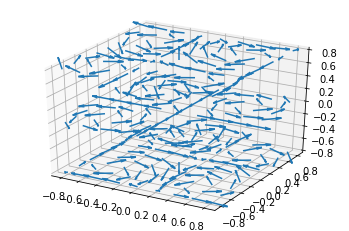

In [70]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.2, normalize=True)

plt.show()

In [ ]:
from sympy import *
x , y,z = symbols('x y z')
Vector_Plot_3D((x**2,y**2,z**2), (x,-10,10),(y,-10,10),(z,-10,20))

In [17]:
%gui qt
from mayavi import mlab
import numpy as np
x, y, z = np.mgrid[0:1:20j, 0:1:20j, 0:1:20j]

u =    np.sin(np.pi*x) * np.cos(np.pi*z)
v = -2*np.sin(np.pi*y) * np.cos(2*np.pi*z)
w = np.cos(np.pi*x)*np.sin(np.pi*z) + np.cos(np.pi*y)*np.sin(2*np.pi*z)
#src = mlab.pipeline.vector_field(u, v, w)
#mlab.pipeline.vectors(src, mask_points=20, scale_factor=3.)
mlab.quiver3d(u,v,w)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [ ]:
Vector_Plot((sin(x),cos(y)),(x,-3,3),(y,-3,3))

In [ ]:
%gui qt
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols
from mayavi import mlab
mlab.init_notebook()
mlab.clf()

#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = fig.gca(projection='3d')
%matplotlib inline

x,y,z = symbols('x y z')
def gradient(f):
    return (f.diff(x), f.diff(y),f.diff(z))

f = x*y**2+z**2
g = gradient(f)
g

xrange = np.linspace(-3,3,10)
yrange = np.linspace(-3,3,10)
zrange = np.linspace(-3,3,10)
X,Y,Z = np.meshgrid(xrange, yrange, zrange)

U = np.zeros((10,10,10))
V = np.zeros((10,10,10))
W = np.zeros((10,10,10))

for i in range(len(xrange)):
    for j in range(len(yrange)):
        for k in range(len(zrange)):
            x1 = X[i,j,k]
            y1 = Y[i,j,k]
            z1 = Z[i,j,k]
            U[i,j,k] = g[0].subs({x:x1, y:y1, z:z1})
            V[i,j,k] = g[1].subs({x:x1, y:y1, z:z1})
            W[i,j,k] = g[2].subs({x:x1, y:y1, z:z1})

        
#ax.quiver(X,Y,Z,U,V,W)
#quiver3d(X,Y,Z,U,V,W)
src = mlab.pipeline.vector_field(u, v, w)
mlab.pipeline.vectors(src, mask_points=20, scale_factor=3)
# plt.title("vector field")
#plt.show()

In [ ]:
def Vector_Plot_3D_mayavi(f, a, b, c, mask_points=1, scale_factor=3, mesh_size=10):
    assert len(a)==len(b)==len(c)==3, "A 3D vector field needs three argments"
    assert len(f)==3, "This function just handle the 3D vector fields"
    
    %gui qt
    
    from mayavi import mlab   
    #mlab.init_notebook()
    #mlab.clf()
    import numpy as np
    #import matplotlib.pyplot as plt
    #%matplotlib notebook
    
# Make the grid
    xrange = np.linspace(a[1],a[2],mesh_size)
    yrange = np.linspace(b[1],b[2],mesh_size)
    zrange = np.linspace(c[1],c[2],mesh_size)
    x, y, z = np.meshgrid(xrange, yrange, zrange)
    

# Make the direction data for the arrows
    u = np.zeros((mesh_size,mesh_size,mesh_size))
    v = np.zeros((mesh_size,mesh_size,mesh_size))
    w = np.zeros((mesh_size,mesh_size,mesh_size))
    
    for i in range(len(xrange)):
        for j in range(len(yrange)):
            for k in range(len(zrange)):
                x1 = x[i,j,k]
                y1 = y[i,j,k]
                z1 = z[i,j,k]
                u[i,j,k] = f[0].subs({a[0]:x1, b[0]:y1, c[0]:z1})
                v[i,j,k] = f[1].subs({a[0]:x1, b[0]:y1, c[0]:z1})
                w[i,j,k] = f[2].subs({a[0]:x1, b[0]:y1, c[0]:z1})

    mlab.init_notebook()
    mlab.clf()
    src = mlab.pipeline.vector_field(u, v, w)
    return mlab.pipeline.vectors(src, mask_points=mask_points, scale_factor=scale_factor)
    #mlab.pipeline.vector_cut_plane(src, mask_points=2, scale_factor=3)
    #mlab.savefig('test.jpg')

In [15]:
%gui qt

from mayavi import mlab
mlab.init_notebook()
mlab.clf()
import numpy as np

def V(x, y, z):
    """ A 3D sinusoidal lattice with a parabolic confinement. """
    return np.cos(10*x) + np.cos(10*y) + np.cos(10*z) + 2*(x**2 + y**2 + z**2)
X, Y, Z = np.mgrid[-2:2:100j, -2:2:100j, -2:2:100j]
mlab.contour3d(X, Y, Z, V)

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [2]:
def Dot(x,y):
    assert len(x)==len(y), "Two vectors must have the same dimension" 
    result = 0
    for i in range(len(x)):
        result += x[i]*y[i]
    return result

In [3]:
def Diff(f,*args):
    return tuple([diff(x,*args) for x in f])

Line integrais are frequently encountered in science and engineering $$\int_a^b \vec{F}. d\vec{r}$$

In [4]:
def Line_Integral(field,curve,a):
    '''
    field:(Tuple) Vector field
    curve:(Tuple) parametrized curve
    a:(Tuple) (parameter of the curve, initial point, final point)
    Note: if the field is tridimensional, the curve also must have the same dimension. 
    
    '''
    assert len(field)==len(curve), "Error: Dimensionaluity of the field and the curve must be equal."
    
    from sympy.abc import x , y, z
    coordinate = [x,y,z]
    parametrized_field=[]
    for index, component in enumerate(field):
        parametrized_field.append(Substitute(component,(coordinate[index], curve[index])))
    
    integrand = Dot(parametrized_field, Diff(curve,a[0]))
    
        
    return integrate(integrand,a)

In [8]:
Line_Integral((x**2,y**2,z**2),(cos(t),sin(t),t), (t,0,pi))

In [21]:
def Norm(v):
    return simplify(sqrt(Dot(v,v)))

In [12]:
from sympy.vector import CoordSys3D 
from sympy import *
x,y,z,phi,theta,t = symbols('x y z phi theta t') 

In [8]:
R.i

R.i

In [89]:
class Curve:
    from sympy.vector import CoordSys3D
    R = CoordSys3D('R')
    
    
    def __init__(self,a,b,c):
        self.x = a
        self.y = b
        self.z = c
        print(a*R.i + b*R.j + c*R.k)
         

In [90]:
curva = Curve(cos(t),sin(t),t)

(cos(t))*R.i + (sin(t))*R.j + t*R.k


In [93]:
def vector(a,b,c):
    
    from sympy.vector import CoordSys3D
    R = CoordSys3D('R')
    #rint(a*R.i + b*R.j + c*R.k)
    parameters = set()
    for component in (a,b,c):
        # in the below the 'if statement' check if the component of curve is a sympy object. 
        if isinstance(component,tuple(core.all_classes)):
            parameters.update(component.free_symbols)
        
    var = list(parameters)[0]
    assert len(parameters)==1 , "Error: A parametrized curve has only one parameter."
    
    def point(i):
        return a.subs(var,i), b.subs(var,i), c.subs(var,i)
    
    #return point
    return expand(a*R.i + b*R.j + c*R.k)

In [95]:
vec = vector(cos(t),sin(t),t)

In [96]:
vec

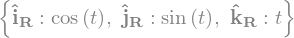

In [81]:
vec.components

In [ ]:
vec.co

In [70]:
def vector1(a,b,c):
    
    from sympy.vector import CoordSys3D
    R = CoordSys3D('R')
    return a*R.i + b*R.j + c*R.k

In [73]:
vec1 = vector1(cos(t),sin(t),t)

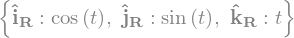

In [74]:
vec.components

In [65]:
vector1(2,3,4)

In [69]:
vec.component

AttributeError: 'VectorAdd' object has no attribute 'component'

In [15]:
def f(x):
    return x**2+1

In [18]:
f(1)

2

In [19]:
f(x)

x**2 + 1

In [47]:
test = set('2')

In [48]:
test[0]

TypeError: 'set' object is not subscriptable

In [25]:
VECTOR(cos(t),sin(t),t)

TypeError: __init__() should return None, not 'tuple'

In [97]:
def Curve(t):
    from sympy.vector import CoordSys3D
    R = CoordSys3D('R')
    return cos(t)*R.i + sin(t)*R.j + t*R.k

In [107]:
curv(t) = Curve(t)

SyntaxError: can't assign to function call (<ipython-input-107-5a5f3a6a2379>, line 1)

In [105]:
curv.subs(t,pi)

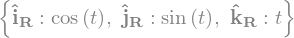

In [106]:
curv.components

In [108]:
def curve1(t): return cos(t)*R.i + sin(t)*R.j + t*R.k

In [109]:
curve1(t)

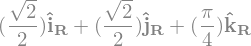

In [112]:
curve1(pi/4)